In [ ]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Load the data sets
df1=pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

#2. Exploring and analysing the dataset

In [13]:
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [15]:
df1.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [17]:
df1.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [19]:
df1.shape

(49068, 10)

In [22]:
df1.size

490680

#3. Cleaning and preparing the dataset

In [27]:
df1.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [29]:
df1['Province/State'].fillna('Unknown', inplace=True)
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Unknown,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Unknown,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Unknown,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Unknown,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


#4. Perform exploratory analysis & visualization Matplotlib

In [33]:
from datetime import datetime as dt

df1['Date'] = df1['Date'].dt.normalize()
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

In [35]:
a = df1.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")

the first date is: 2020-01-22
the last date is: 2020-07-27


In [37]:
total_cases = df1.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Text(0.5, 1.0, 'Globally confirmed cases')

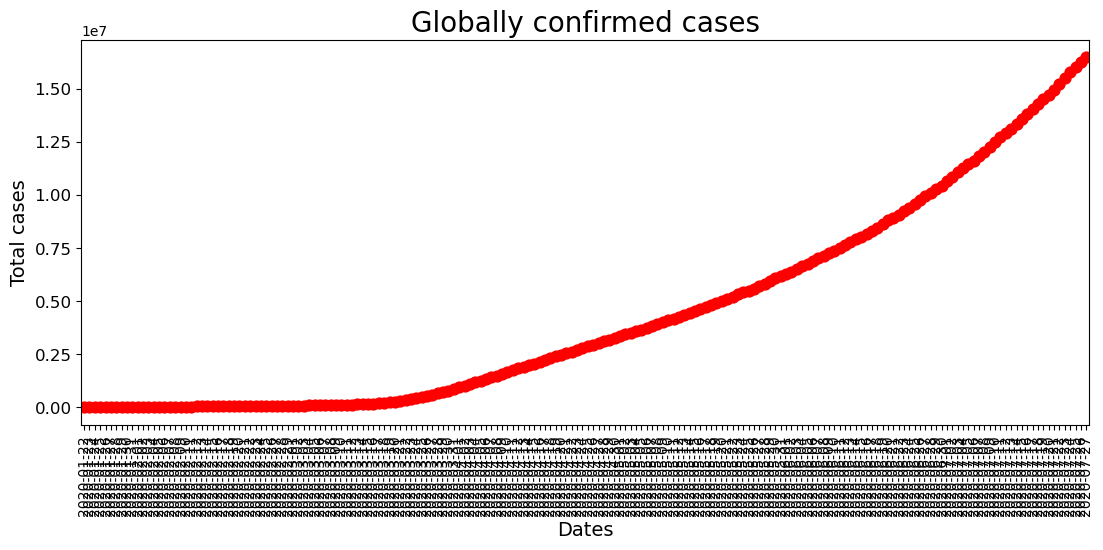

In [39]:
plt.figure(figsize= (13,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Globally confirmed cases', fontsize=20)

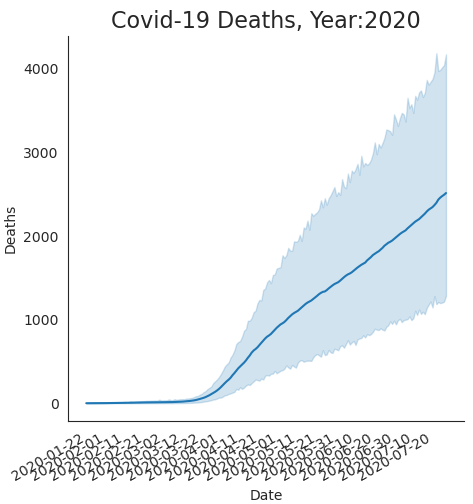

In [41]:
with sns.axes_style('white'):
    
    g = sns.relplot(
        x="Date", 
        y="Deaths", 
        kind="line", 
        data=df1
    )
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title("Covid-19 Deaths, Year:2020", fontsize=16)

In [42]:
#countries with the highest number of casualties
top = df1.loc[df1['Date'] == df1['Date'].max()]
top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

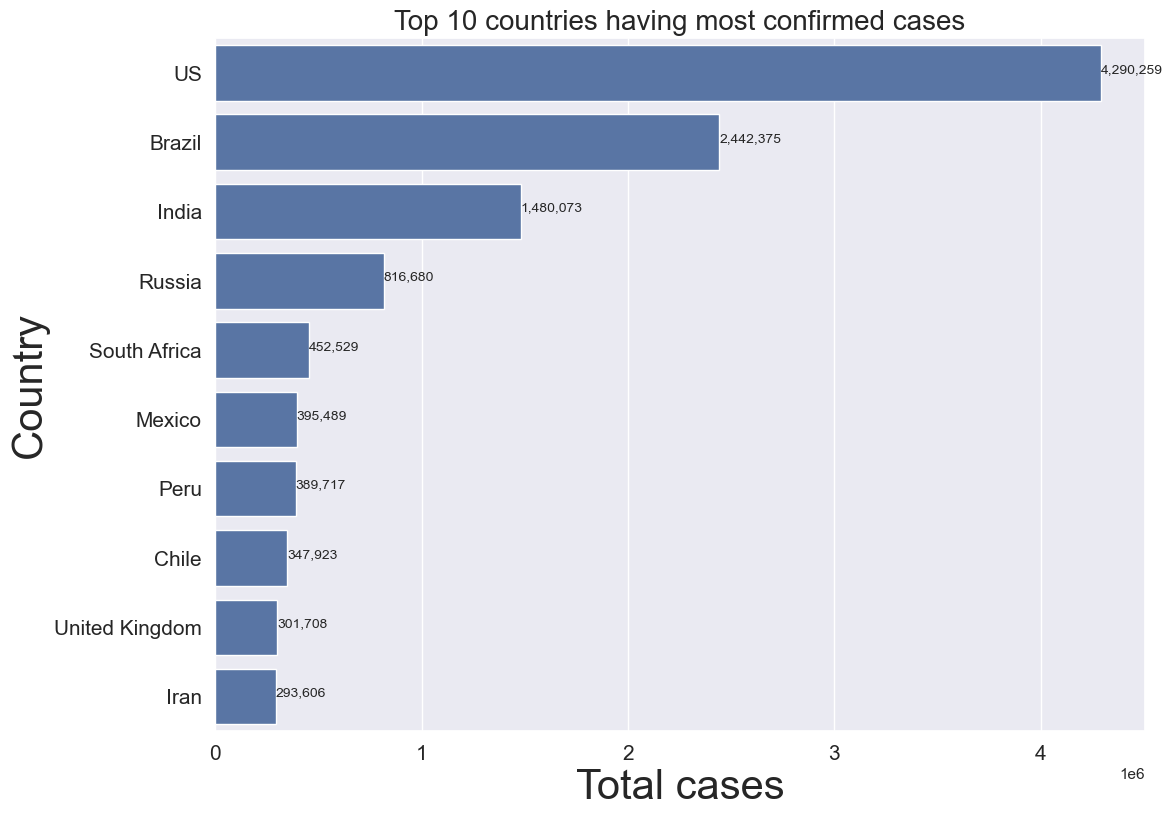

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize= (12,9))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

In [65]:
India_data = df1.loc[df1['Country/Region'] == 'India', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active']]
India_data.head()

,Date,Recovered,Deaths,Confirmed,Active
129,737446,0,0,0,0
390,737447,0,0,0,0
651,737448,0,0,0,0
912,737449,0,0,0,0
1173,737450,0,0,0,0


In [67]:
India_data.shape

(188, 5)

In [51]:
India_data = India_data.groupby('Date').sum().reset_index()
India_data = India_data.iloc[135:]
India_data.head()

,Date,Recovered,Deaths,Confirmed,Active
135,2020-06-05,113233,6649,236184,116302
136,2020-06-06,118695,6946,246622,120981
137,2020-06-07,123848,7207,257486,126431
138,2020-06-08,129095,7473,265928,129360
139,2020-06-09,134670,7750,276146,133726


Text(0.5, 1.0, "India's Active Cases Over Time")

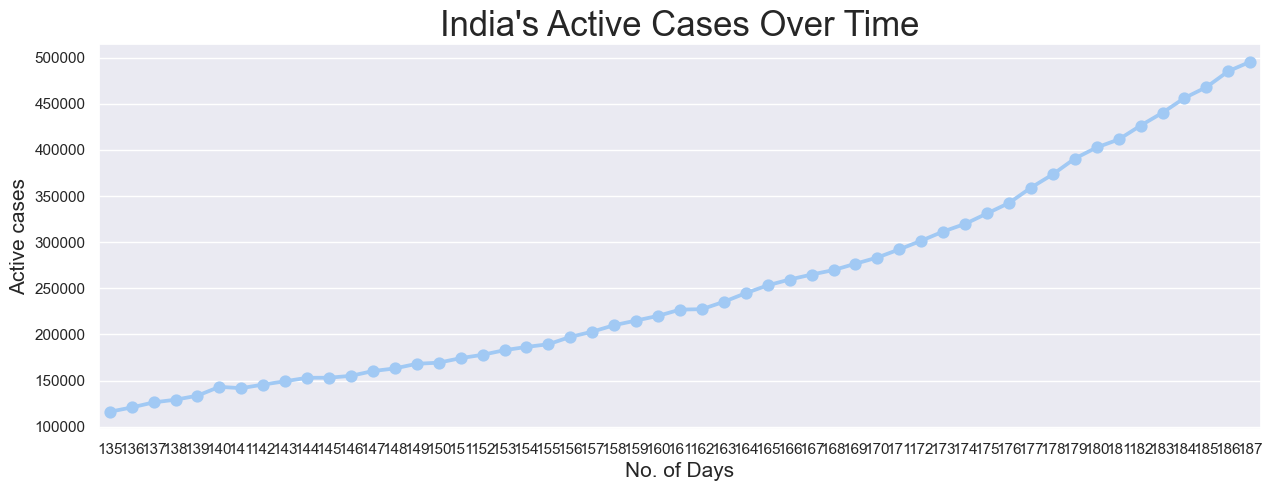

In [53]:
plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")


sns.pointplot(x=India_data.index, y=India_data['Active'], color='b')

plt.xlabel('No. of Days', fontsize=15)
plt.ylabel('Active cases', fontsize=15)
plt.title("India's Active Cases Over Time", fontsize=25)

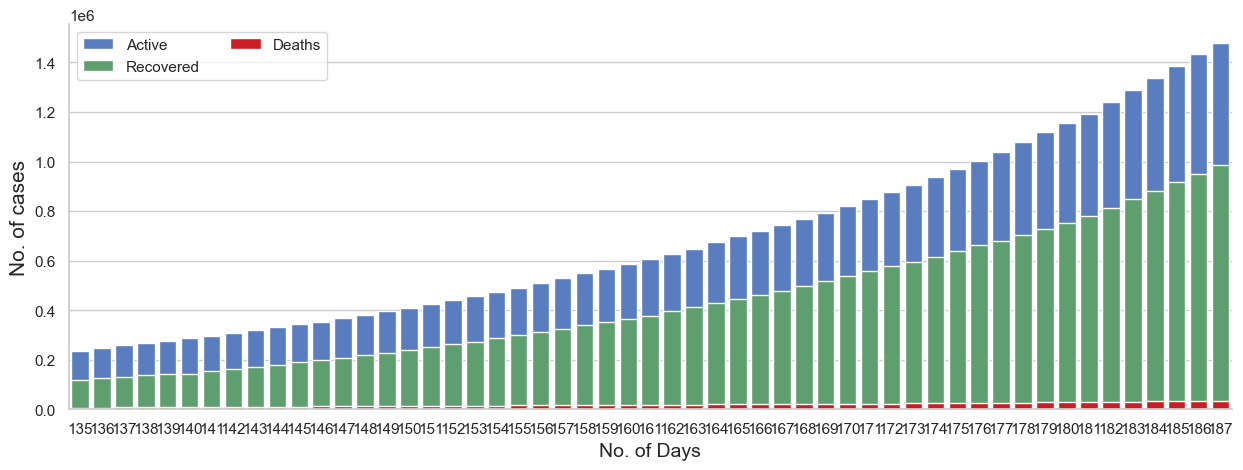

In [55]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Plot the total cases
sns.set_color_codes("muted")
sns.barplot(x=India_data.index, y=India_data.Active + India_data.Recovered + India_data.Deaths,
            label="Active", color="b")

# Plot the recovered
sns.set_color_codes("deep")
sns.barplot(x=India_data.index, y=India_data.Recovered + India_data.Deaths, 
            label="Recovered", color="g")

# Plot the Deaths
sns.set_color_codes("bright")
sns.barplot(x=India_data.index ,y=India_data.Deaths, 
            label="Deaths", color="r")

plt.xlabel('No. of Days', fontsize=14)
plt.ylabel('No. of cases', fontsize=15)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)

#Model Development

Mean Squared Error (MSE): 17040860057.251175


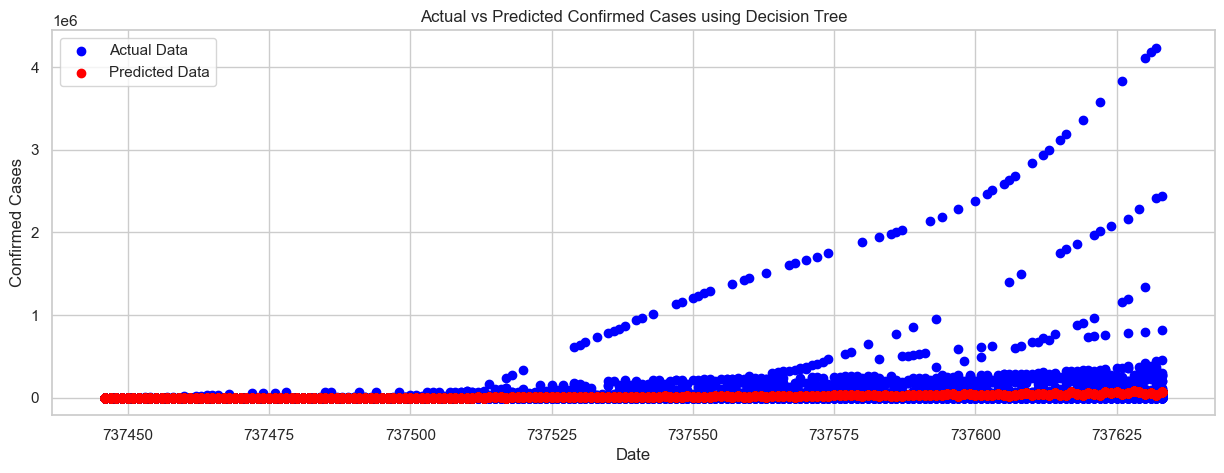

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is already your dataset and you have 'Date' and 'Confirmed' columns

# Prepare data (convert date to numerical format)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df1[['Date']]  # Feature: Date
y = df1['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

#  we now Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()